In [54]:
%load_ext autoreload
%autoreload 2

from rpasim.ode.rpa.ab import ABControlled as AB
from rpasim.env import DifferentiableEnv
from rpasim.plot.ode import plot_trajectory
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(<Figure size 600x400 with 2 Axes>,
 array([<Axes: xlabel='time', ylabel='A'>,
        <Axes: xlabel='time', ylabel='B'>], dtype=object))

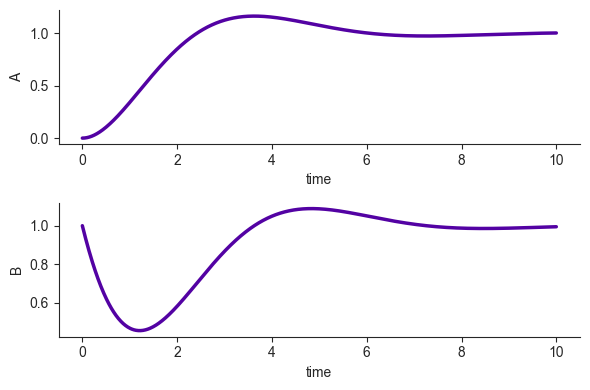

In [16]:
import torch


ode = AB()

plot_trajectory(ode, x0=torch.Tensor([0,1]), T=10)

In [ ]:
T = 10
state0 = torch.Tensor([0.0, 1.0])

env = DifferentiableEnv(
    initial_ode=ode,
    reward_fn=lambda state, time: torch.norm(state)**2, # want large norms
    initial_state=state0,
    time_horizon=T,
    n_reward_steps=100
)

final state: tensor([1.0040, 1.0123])
total reward: 698.08
steps: 1001


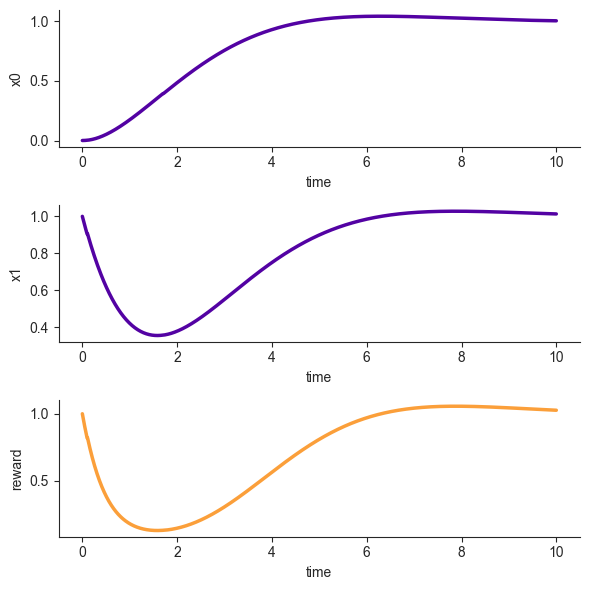

In [26]:
from rpasim.gyms.ab import ABGym
from rpasim.plot.env import plot_env_trajectory

gym = ABGym(
    reward_fn=lambda state, time: state[1]**2,
    initial_state=torch.tensor([0.0, 1.0]),
    time_horizon=T,
    dt=0.1,
)

state, info = gym.reset()

done = False
while not done:
    state, reward, terminated, truncated, info = gym.step(u=0.5)
    done = terminated or truncated

plot_env_trajectory(gym)

times, states, rewards = gym.get_trajectory()
print(f"final state: {state}")
print(f"total reward: {rewards.sum():.2f}")
print(f"steps: {len(times)}")

In [66]:
def simple_controller(state):
    A, B = state
    Bdot = A-B

    u_hard = 1
    u_soft = 0.2

    if B > 1:
        if Bdot < 0:
            u = u_hard
        else:
            u = u_soft
    else:
        if Bdot > 0:
            u = u_hard
        else:
            u = u_soft
    

    u = 0.5
    return u


In [58]:
alpha = 50
period = 2*np.pi / (np.sqrt(alpha) - 0.25)
period

np.float64(0.9211439440976932)

In [61]:
dt

np.float64(0.09211439440976932)

In [62]:
T

np.float64(9.211439440976932)

n_reward_steps: 300
final state: tensor([0.9991, 1.0014])
total reward: 299.21
steps: 301


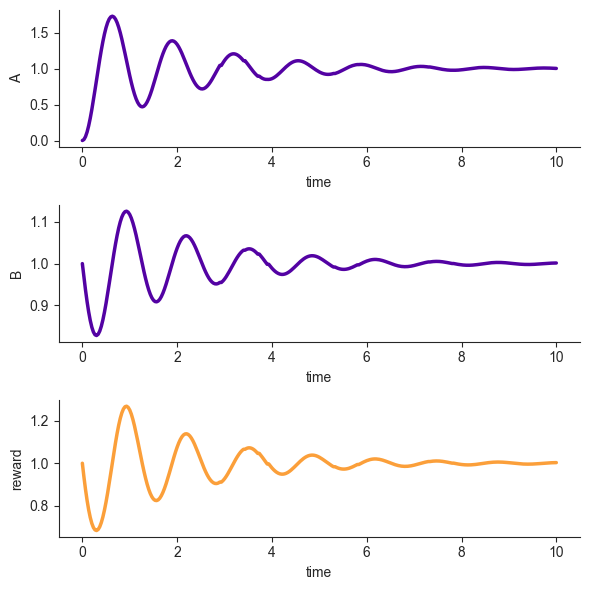

In [67]:
dt = period / 10.
T = period * 10

dt = 0.1
T = 10
n_reward_steps = int(T/dt)*3
print(f"n_reward_steps: {n_reward_steps}")

gym = ABGym(
    reward_fn=lambda state, time: state[1]**2,
    initial_state=torch.tensor([0.0, 1.0]),
    time_horizon=T,
    dt=dt,
    n_reward_steps=n_reward_steps,
    alpha=50
)

state, info = gym.reset()

done = False
while not done:
    u = simple_controller(state)
    state, reward, terminated, truncated, info = gym.step(u=u)
    done = terminated or truncated

plot_env_trajectory(gym)

times, states, rewards = gym.get_trajectory()
print(f"final state: {state}")
print(f"total reward: {rewards.sum():.2f}")
print(f"steps: {len(times)}")